# Climate Analysis and Exploration

In [1]:
#import dependencies
import pandas as pd
import numpy as np

from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

from sqlalchemy.orm import Session
from sqlalchemy import Column, Float, Integer, String
from sqlalchemy.ext.automap import automap_base

In [2]:
engine = create_engine('sqlite:///hawaii.sqlite') #to connect to my DB
session = Session(bind = engine)

In [3]:
Base = automap_base()
Base.prepare(engine, reflect = True)
Base.classes.keys()

['Measurement', 'measurements', 'stations']

In [4]:
session = Session(engine) #to prepare to query something

In [5]:
Stations = Base.classes.stations
Measurement = Base.classes.Measurement

In [6]:
Measurement.__dict__
Stations.__dict__

mappingproxy({'__doc__': None,
              '__init__': <function __init__>,
              '__mapper__': <Mapper at 0x109520e10; stations>,
              '__module__': 'sqlalchemy.ext.automap',
              '__table__': Table('stations', MetaData(bind=None), Column('id', INTEGER(), table=<stations>, primary_key=True, nullable=False), Column('station', VARCHAR(length=200), table=<stations>), Column('name', VARCHAR(length=200), table=<stations>), Column('latitude', FLOAT(), table=<stations>), Column('longitude', FLOAT(), table=<stations>), Column('elevation', FLOAT(), table=<stations>), schema=None),
              '_sa_class_manager': <ClassManager of <class 'sqlalchemy.ext.automap.stations'> at 1094fc990>,
              'elevation': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1094fce08>,
              'id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1094fca98>,
              'latitude': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1094fcca8>,
            

In [7]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x109554e80>,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65}

In [8]:
session.query(Measurement).filter_by(prcp=0.00).count()

16370

## Precipitation Analysis

In [9]:
# print and append all the dates and prcp values into the database

mydates =[]
myprcp = []
measurement_data = session.query(Measurement).filter(
    Measurement.date >= '2016-08-23').all()
for data in measurement_data:
    #print(dates.date)
    #print(data.prcp)
    mydates.append(data.date)
    myprcp.append(data.prcp)
    
    
#newdf = pd.DataFrame(data=prcpanalyze)

In [10]:
prcp_date_df = pd.DataFrame({
    "dates":mydates,
    "myprcp":myprcp
    
})
prcp_date_df.head()

prcp = prcp_date_df["myprcp"]
dates = prcp_date_df["dates"]

In [11]:
sumary_stats = pd.DataFrame({ "Average Prcp":[prcp_date_df["myprcp"].mean()],
              "Max Prcp":[prcp_date_df["myprcp"].max()],
              "Min Prcp":[prcp_date_df["myprcp"].min()]
}) 

sumary_stats

,Average Prcp,Max Prcp,Min Prcp
0,0.177279,6.7,0.0


In [12]:
prcp_date_df.describe()

,myprcp
count,4042.000000
mean,0.177279
std,0.461132
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


sns.barplot(x=dates,y=myprcp,data=prcp_date_df, palette="viridis")
plt.xticks([])
plt.xlabel("Dates", size=15)
plt.ylabel("Precipitation", size=15)
plt.title("Precipitation Levels in Hawaii Across Time")

## Station Analysis

In [14]:
myStations = []
measurement_data1 = session.query(Measurement.station).group_by(Measurement.station).count()
measurement_data1

9

In [15]:
session.query(Measurement).filter(Measurement.station =="USC00514830").count()

3874

In [16]:
from sqlalchemy import func

station_count = session.query(Measurement.station, func.count(
    Measurement.station)).group_by(Measurement.station).order_by(
    func.count(Measurement.station).desc()).all()
station_count


[('USC00519281', 5544),
 ('USC00513117', 5392),
 ('USC00519397', 5370),
 ('USC00519523', 5144),
 ('USC00516128', 4968),
 ('USC00514830', 3874),
 ('USC00511918', 3864),
 ('USC00517948', 1366),
 ('USC00518838', 684)]

In [34]:
station_count_df = pd.DataFrame({ "Station": ["USC00519281","USC00513117","USC00519397","USC00519523","USC00516128",
                           "USC00514830","USC00511918","USC00517948","USC00518838"],
              "Count":[5544,5392,5370,5144,4968,3874,3864,1366,684] 
})

station_count_df

print("USC00519281 has the higher numbers of observations.")

USC00519281 has the higher numbers of observations.


In [18]:
#retrive the last 12 months of temperature observation data (tobs) and filtered by the most popular station
mytobs=[]
newdates=[]
tob_query = session.query(Measurement).filter(Measurement.date >= '2016-08-23').filter(
    Measurement.station == 'USC00519281').all()
for data in tob_query:
    #print(data.tobs)
    newdates.append(data.date)
    mytobs.append(data.tobs)

In [19]:
tobs_df = pd.DataFrame({
    'Date':newdates,
    'Tobs':mytobs
})

tobs_df.head()


,Date,Tobs
0,2016-08-23,77
1,2016-08-24,77
2,2016-08-25,80
3,2016-08-26,80
4,2016-08-27,75


In [20]:
tobs_x = tobs_df["Tobs"]

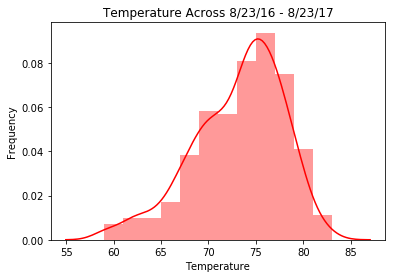

In [21]:
import matplotlib.pyplot as plt
x = pd.Series(tobs_x,name="Temperature")
ax = sns.distplot(x, color='red',bins=12)
plt.title("Temperature Across 8/23/16 - 8/23/17")
plt.ylabel("Frequency")

## Temperature Analysis

In [22]:
import datetime as dt

def calc_temps(start_date,end_date):
    temps=[]
    temp_query = session.query(func.max(
        Measurement.tobs),func.min(Measurement.tobs), func.avg(Measurement.tobs)).filter(
        Measurement.date.between(start_date, end_date)).all()
    return temp_query

 
    

In [23]:
vacay_dates = calc_temps("2017-07-15","2017-07-25")
vacay_dates

[(83, 72, 78.57352941176471)]

In [24]:
max_temp = [data[0] for data in vacay_dates]
min_temp = [data[1] for data in vacay_dates]
avg_temp = [data[2] for data in vacay_dates]

In [25]:
hawaii_vacations = pd.DataFrame({
    "Max Temp": max_temp,
    "Min Temp":min_temp,
    "Avg Temp":avg_temp
    
})
hawaii_vacations

,Avg Temp,Max Temp,Min Temp
0,78.573529,83,72


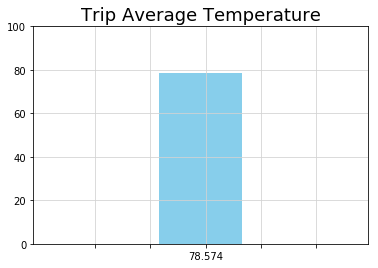

In [26]:
width = 1.5
#set x ticks

y_axis = [0, 0 , hawaii_vacations["Avg Temp"][0], 0 , 0]
fig, ax = plt.subplots()

x_axis = np.arange(5)
ax.set_xticks(x_axis + width / 17)

rects1 = ax.bar(x_axis,
                y_axis, color='skyblue', width = width)
ax.set_xticklabels(("","",round(hawaii_vacations["Avg Temp"][0],3),"","",""))

plt.ylim(0,100,20)
plt.title("Trip Average Temperature", size=18)
plt.grid(color="lightgray")



In [27]:
hawaii_vacations["Avg Temp"][0]

78.57352941176471

## Climate App


In [28]:
from flask import Flask, jsonify

app = Flask(__name__)

@app.route("/api/v1.0/precipitation")
def precipitation():
    all_results=[]
    #Query all Measurement
    results = session.query(Measurement).filter(Measurement.date >= '2017-04-04').all()   
    #Create a dictionary from the row data and append to list    
    for data in results:
        results_dict={}
        results_dict["date"] = data.date
        results_dict["tobs"] = data.tobs
        all_results.append(results_dict)  
    return jsonify(all_results)


In [29]:
@app.route("/api/v1.0/stations")
def station():
    station = session.query(Measurement.station).group_by(Measurement.station).all()
   #station= session.query(Stations.station).all()
    hawaii_stations = list(np.ravel(station))   
    return jsonify(hawaii_stations)



In [30]:
@app.route("/api/v1.0/tobs")
def temperature():
    tob_query = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= '2017-04-04').all()
    #use np.ravel to combine the tobs
    tobs_results = list(np.ravel(tob_query))
    return jsonify(tobs_results)

In [31]:
@app.route("/api/v1.0/2017-07-11")
def start_temp():
    results = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.date >='2017-07-11').all()
    start_date = list(np.ravel(results))
    return jsonify(start_date)



In [32]:
@app.route("/api/v1.0/2017-07-01/2017-07-15")
def two_dates():
    temp_query = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.date.between("2017-07-01", "2017-07-07")).all()   
    temp_results = list(np.ravel(temp_query))
    return jsonify(temp_results)

In [33]:
if __name__ == "__main__":
    app.run(debug=True)

 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
 * Restarting with stat


SystemExit: 1

/Users/EricaLei/anaconda/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
